Nama : Siti Sarah Febrihartina <br>
NIM : I2310274

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

In [24]:
(x_train, x_label),(y_test, y_label) = cifar100.load_data(label_mode='fine')

Jumlah data pada dataset reptiles berjumlah 5 kelas dengan total 50000 gambar dari 5 kelas.

In [25]:
#nama superclass
indeks_reptiles = {
    "crocodile"  : 27,
    "dinosaur"   : 29,
    "lizard"     : 44,
    "snake"      : 78,
    "turtle"     : 93
}

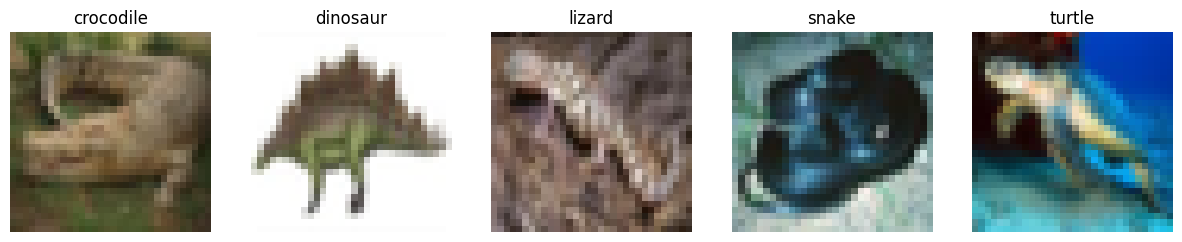

In [26]:
plt.figure(figsize=(15,3))
for i, (nama_kelas, nama_indeks) in enumerate (indeks_reptiles.items()):
  indeks = np.where(x_label.flatten() == nama_indeks)[0][0]
  plt.subplot(1, len(indeks_reptiles), i + 1)
  plt.imshow(x_train[indeks])
  plt.title(nama_kelas)
  plt.axis("off")
plt.show()

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
x_label.shape

(50000, 1)

In [29]:
# Normalisasikan

x_train_baru = x_train.astype('float32')/255.0
y_test_baru = y_test.astype('float32')/255.0


# Model CNN

In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])


In [20]:
#Proses Training
model_cnn.compile(optimizer = 'adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])

# Model RCNN

In [31]:
model_rcnn = tf.keras.Sequential([
    tf.keras.layers.Reshape((32, 32, 3), input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(100, activation='softmax')
])

# Penjelasan dan jenis Layer pada CNN <br>


*   LayerInput:Mewakili data input mentah, biasanya berupa gambar dalam konteks
*   Layer Input:Mewakili data input mentah, biasanya berupa gambar dalam konteks
*   Layer Konvolusi: Merupakan blok dasar dari CNN.
Melakukan operasi konvolusi pada data input menggunakan filter atau kernel untuk mengekstrak fitur.
*   Layer Aktivasi (ReLU - Rectified Linear Unit): Memperkenalkan non-linearitas ke dalam model dengan menerapkan fungsi aktivasi (biasanya ReLU).
Membantu jaringan dalam mempelajari pola dan hubungan yang kompleks.
*   Layer Pooling (Subsampling atau Down-sampling): Mengurangi dimensi spasial dari peta fitur.


*   Layer Flatten: Mengubah peta fitur multi-dimensi menjadi vektor satu dimensi.
*   Layer Dense : Menggabungkan fitur yang dipelajari oleh lapisan sebelumnya untuk membuat prediksi.


*   Layer Output: Menghasilkan output akhir dari jaringan.
*   Layer Normalisasi (Batch Normalization): untuk menormalisasi input dari setiap lapisan untuk menstabilkan dan mempercepat proses pelatihan.


*   Layer Dropout: Mengurangi overfitting dengan mencegah koadaptasi neuron.






# Penjelasan dan jenis Layer pada RCNN :<br>


*   Layer Pemotongan Proposals (Region Proposal Layer): Bertanggung jawab untuk menghasilkan daftar proposisi wilayah (region proposals) yang kemungkinan mengandung objek.Pemotongan proposisi dapat dilakukan dengan menggunakan algoritma seperti Selective Search.
*   Layer Ekstraksi Fitur (Feature Extraction Layer): Menggunakan model konvolusi pra-pelatihan (pre-trained convolutional model), seperti VGG atau ResNet, untuk mengekstrak fitur dari setiap region proposal. Fitur ini kemudian digunakan untuk membedakan antara objek dan latar belakang.


*   Layer Pemilihan ROI (Region of Interest Pooling Layer):Mengubah ukuran semua region proposals menjadi ukuran yang tetap, agar dapat dimasukkan ke dalam jaringan fully connected. Memastikan bahwa setiap proposal menghasilkan vektor fitur dengan ukuran yang seragam.
*   Layer Klasifikasi (Classification Layer): Menggunakan vektor fitur yang dihasilkan untuk mengklasifikasikan apakah region tersebut berisi objek tertentu atau bukan. Biasanya menggunakan lapisan fully connected di bagian akhir.


*   Layer Regresi (Regression Layer): Menggunakan vektor fitur untuk menghasilkan informasi lokasi yang tepat dari objek dalam region proposal.
Dikombinasikan dengan hasil klasifikasi untuk mendapatkan kotak pembatas (bounding box) yang tepat.
*   Layer Non-Maximum Suppression (NMS):Diterapkan untuk menghilangkan tumpang tindih antara kotak pembatas yang terdeteksi dan memilih kotak pembatas yang paling akurat.


*   Layer Output: Menyajikan hasil akhir deteksi, termasuk label kelas dan lokasi objek yang ditemukan.








In [32]:
# compile dan fit pada model CNN

model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_cnn.fit(x_train_baru, x_label, epochs=10, batch_size=256)


Epoch 1/10
196/196 [==============================] - 39s 194ms/step - loss: 4.0272 - accuracy: 0.0897
Epoch 2/10
196/196 [==============================] - 32s 163ms/step - loss: 3.5711 - accuracy: 0.1610
Epoch 3/10
196/196 [==============================] - 34s 175ms/step - loss: 3.4055 - accuracy: 0.1899
Epoch 4/10
196/196 [==============================] - 34s 174ms/step - loss: 3.3163 - accuracy: 0.2060
Epoch 5/10
196/196 [==============================] - 28s 144ms/step - loss: 3.2392 - accuracy: 0.2188
Epoch 6/10
196/196 [==============================] - 29s 146ms/step - loss: 3.1970 - accuracy: 0.2275
Epoch 7/10
196/196 [==============================] - 35s 177ms/step - loss: 3.1552 - accuracy: 0.2366
Epoch 8/10
196/196 [==============================] - 32s 162ms/step - loss: 3.1253 - accuracy: 0.2389
Epoch 9/10
196/196 [==============================] - 32s 163ms/step - loss: 3.0897 - accuracy: 0.2482
Epoch 10/10
196/196 [==============================] - 33s 171ms/step - l

#Compile dan Fit

In [33]:
#Compile dan fit pada model RCNN
model_rcnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_rcnn.fit(x_train_baru, x_label, epochs=10, batch_size=256)

Epoch 1/10
196/196 [==============================] - 29s 144ms/step - loss: 4.1318 - accuracy: 0.0819
Epoch 2/10
196/196 [==============================] - 32s 164ms/step - loss: 3.4781 - accuracy: 0.1782
Epoch 3/10
196/196 [==============================] - 35s 177ms/step - loss: 3.2641 - accuracy: 0.2143
Epoch 4/10
196/196 [==============================] - 28s 144ms/step - loss: 3.1299 - accuracy: 0.2387
Epoch 5/10
196/196 [==============================] - 28s 143ms/step - loss: 3.0569 - accuracy: 0.2532
Epoch 6/10
196/196 [==============================] - 28s 144ms/step - loss: 2.9991 - accuracy: 0.2651
Epoch 7/10
196/196 [==============================] - 31s 159ms/step - loss: 2.9287 - accuracy: 0.2782
Epoch 8/10
196/196 [==============================] - 31s 160ms/step - loss: 2.8864 - accuracy: 0.2893
Epoch 9/10
196/196 [==============================] - 31s 159ms/step - loss: 2.8197 - accuracy: 0.2987
Epoch 10/10
196/196 [==============================] - 31s 158ms/step - l

#Menyimpan Kedua Model

In [34]:
model_cnn.save('model_cnn_sarah.h5')
model_rcnn.save('model_rcnn_sarah.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Memuat Kembali Model

In [35]:
loaded_model_cnn = tf.keras.models.load_model('model_cnn_sarah.h5')
loaded_model_rcnn = tf.keras.models.load_model('model_rcnn_sarah.h5')

# Plot Akurasi Model Pertama

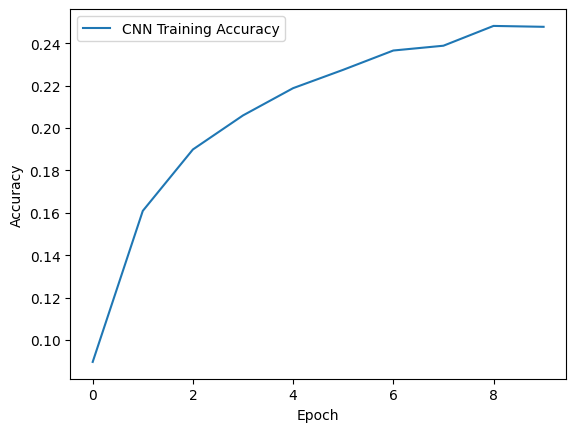

In [36]:
plt.plot(model_cnn.history.history['accuracy'], label='CNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Akurasi Model Kedua

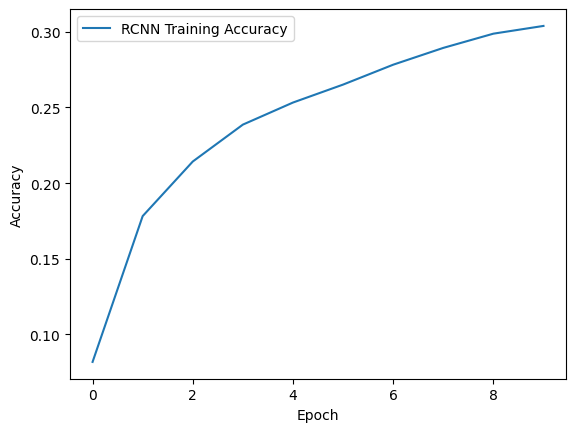

In [37]:
plt.plot(model_rcnn.history.history['accuracy'], label='RCNN Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Kesimpulan

Dari hasil kedua model dalam penggambaran akurasi, terlihat perbedaan dari keduanya,walaupun hanya sedikit, dimana pada model CNN memiliki akurasi yang lebih rendah dari RCNN. Akurasi CNN sempat rendah pada epoch ke-7, sedangkan pada RCNN terus meningkat hingga epoch terakhir. dalam hal ini berarti akurasi cukup meningkat apabila menggunakan model RCNN.